<a href="https://colab.research.google.com/github/carlosnylander/TrabalhoML/blob/main/Testandooverfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selecionando 31160 linhas (40%) do dataset original para análise.

Dos 77902 dados selecionados para o processo:
 - 70111 amostras para treino (90%)
 - 7791 amostras para teste (10%)

Iniciando treinamento e avaliação dos modelos (sobre o subconjunto de dados)...

Treinando e avaliando MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MLP Model - MAE: 0.0927, MSE: 0.0088, RMSE: 0.0938

Treinando e avaliando CNN...
CNN Model - MAE: 0.4235, MSE: 0.1817, RMSE: 0.4263

Treinando e avaliando LSTM...
LSTM Model - MAE: 67.8236, MSE: 7211.0781, RMSE: 84.9181

Treinando e avaliando GRU...
GRU Model - MAE: 59.2263, MSE: 5508.3002, RMSE: 74.2179

Treinando e avaliando RNN...
RNN Model - MAE: 181.3901, MSE: 42947.5881, RMSE: 207.2380

Treinamento e avaliação concluídos.

🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...
  Informações da Faixa para o Modelo: MLP
    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: 206.91
    - Largura da Faixa (valor ± em relação à predição): 206.91 (correspondente a 1.0σ)
  Informações da Faixa para o Modelo: CNN
    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: 206.85
    - Largura da Faixa (valor ± em relação à predição): 206.85 (correspondente a 1.0σ)
  Informações da Faixa para o Modelo: LSTM
    - Desvio Padrão das Predições (σ) em t

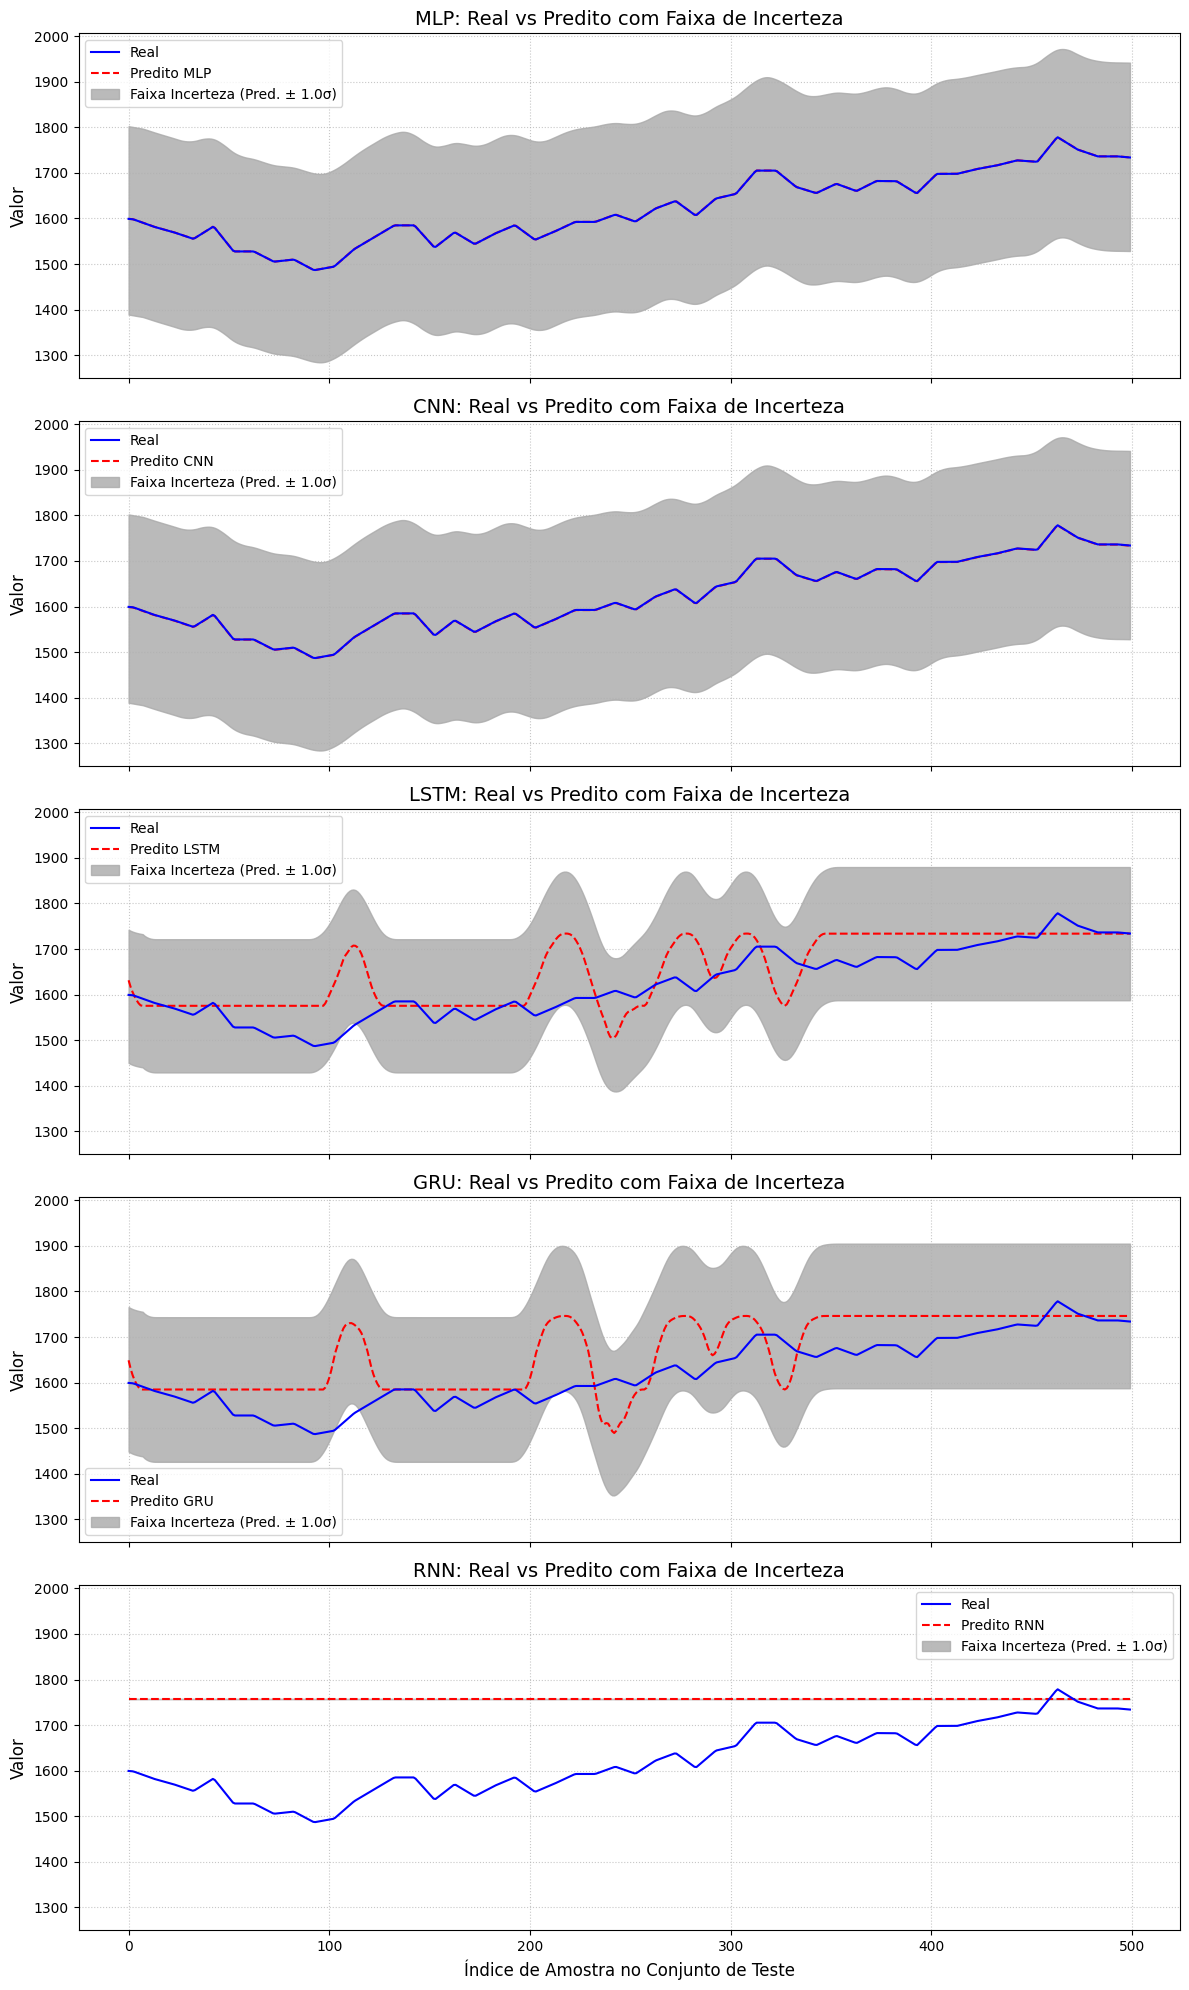


Gráficos de Real vs Predito gerados.


In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------
# ETAPA 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS
# -------------------------------------------------------------------------
data = pd.read_csv('/content/oficialtcld0903.csv')  # Atualize o caminho se necessário

X = data.drop(columns=['TCSacr'])
y = data['bal75']



# --- NOVA ETAPA: SELECIONAR 80% DO DATASET PARA ANÁLISE ---
fraction_to_use_for_analysis = 0.4
# Opção 1: Selecionar uma amostra aleatória de 80% (recomendado para evitar viés de ordenação)
#data = data.sample(frac=fraction_to_use_for_analysis, random_state=42).copy() # random_state para reprodutibilidade
# Opção 2: Selecionar as primeiras 80% das linhas (se a ordem for importante e intencional)
num_rows_to_keep = int(len(data) * fraction_to_use_for_analysis)
data = data.iloc[:num_rows_to_keep].copy()

print(f"Selecionando {len(data)} linhas ({fraction_to_use_for_analysis*100:.0f}%) do dataset original para análise.")
# --- FIM DA NOVA ETAPA ---


# Dividir os dados em treino (80%) e teste (20%)
# Usando a lógica de n_train para um split 80/20
split_percentage_train = 0.9
n_train = int(len(X) * split_percentage_train)

if n_train == 0 or n_train == len(X):
    print(f"Erro: Divisão de treino/teste resultou em um conjunto de treino ou teste vazio.")
    print(f"Total de amostras: {len(X)}, Amostras de treino calculadas (80%): {n_train}")
    exit()

X_train, X_test = X.iloc[:n_train], X.iloc[n_train:]
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

print(f"\nDos {len(X)} dados selecionados para o processo:")
print(f" - {len(X_train)} amostras para treino ({split_percentage_train*100:.0f}%)")
print(f" - {len(X_test)} amostras para teste ({(1-split_percentage_train)*100:.0f}%)")

if X_train.empty or X_test.empty:
    print("Erro crítico: Conjuntos de treino ou teste estão vazios após a divisão. Verifique o tamanho dos dados.")
    exit()

# -------------------------------------------------------------------------
# ETAPA 2: DEFINIÇÃO DOS MODELOS
# -------------------------------------------------------------------------
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(10, input_dim=input_dim, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_dim):
    model = Sequential([
        Conv1D(10, 2, activation='relu', input_shape=(input_dim, 1)), # CNN espera entrada 3D
        Flatten(),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_dim):
    model = Sequential([
        LSTM(10, input_shape=(input_dim, 1), activation='tanh'), # LSTM espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_gru_model(input_dim):
    model = Sequential([
        GRU(10, input_shape=(input_dim, 1), activation='tanh'), # GRU espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_dim):
    model = Sequential([
        SimpleRNN(10, input_shape=(input_dim, 1), activation='tanh'), # RNN espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# -------------------------------------------------------------------------
# ETAPA 3: FUNÇÃO DE TREINAMENTO E AVALIAÇÃO
# -------------------------------------------------------------------------
def train_and_evaluate_model(model_name, model, X_train_data, y_train_data, X_test_data, y_test_data):
    print(f"\nTreinando e avaliando {model_name}...")

    if model_name in ['CNN', 'LSTM', 'GRU', 'RNN']:
        X_train_vals = X_train_data.values if isinstance(X_train_data, pd.DataFrame) else X_train_data
        X_test_vals = X_test_data.values if isinstance(X_test_data, pd.DataFrame) else X_test_data

        X_train_r = np.expand_dims(X_train_vals, axis=2)
        X_test_r = np.expand_dims(X_test_vals, axis=2)

        history = model.fit(X_train_r, y_train_data, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_r, verbose=0).flatten()
    else: # MLP
        history = model.fit(X_train_data, y_train_data, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_data, verbose=0).flatten()

    mae = mean_absolute_error(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Model - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    return y_pred, rmse

# -------------------------------------------------------------------------
# ETAPA 4: TREINAMENTO DOS MODELOS
# -------------------------------------------------------------------------
input_dimension = X_train.shape[1] # Número de features

mlp_model = create_mlp_model(input_dimension)
cnn_model = create_cnn_model(input_dimension)
lstm_model = create_lstm_model(input_dimension)
gru_model = create_gru_model(input_dimension)
rnn_model = create_rnn_model(input_dimension)

print("\nIniciando treinamento e avaliação dos modelos (sobre o subconjunto de dados)...")

y_pred_mlp, _ = train_and_evaluate_model("MLP", mlp_model, X_train, y_train, X_test, y_test)
y_pred_cnn, _ = train_and_evaluate_model("CNN", cnn_model, X_train, y_train, X_test, y_test)
y_pred_lstm, _ = train_and_evaluate_model("LSTM", lstm_model, X_train, y_train, X_test, y_test)
y_pred_gru, _ = train_and_evaluate_model("GRU", gru_model, X_train, y_train, X_test, y_test)
y_pred_rnn, _ = train_and_evaluate_model("RNN", rnn_model, X_train, y_train, X_test, y_test)

print("\nTreinamento e avaliação concluídos.")

# Coletar resultados para plotagem
results_for_plotting = {
    "MLP": y_pred_mlp,
    "CNN": y_pred_cnn,
    "LSTM": y_pred_lstm,
    "GRU": y_pred_gru,
    "RNN": y_pred_rnn
}
can_plot = True

# -------------------------------------------------------------------------
# ETAPA 5: FUNÇÕES DE PLOTAGEM E EXECUÇÃO
# -------------------------------------------------------------------------

def smooth_series(series, window_size=1):
    """Aplica suavização de média móvel a uma série."""
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(window=window_size, min_periods=1, center=True).mean().values

def plot_real_vs_predito_com_incerteza_subplots(
    results_dict,
    y_test_data,
    num_points_to_plot=500,
    scale_factor=1.0,
    smoothing_window=15,
    enable_smoothing=True,
    pred_line_color='red',
    real_line_color='blue',
    interval_fill_color='gray',
    interval_alpha=0.4
):
    model_names = list(results_dict.keys())
    num_models = len(model_names)

    if num_models == 0:
        print("Nenhum resultado de modelo para plotar em 'Real vs Predito'.")
        return

    if isinstance(y_test_data, pd.Series):
        y_test_np = y_test_data.values
    elif isinstance(y_test_data, list):
        y_test_np = np.array(y_test_data)
    else:
        y_test_np = y_test_data

    actual_points_to_plot = min(num_points_to_plot, len(y_test_np))
    y_test_plot_slice = y_test_np[:actual_points_to_plot]
    indices = np.arange(actual_points_to_plot)

    fig, axs = plt.subplots(num_models, 1, figsize=(12, 4 * num_models), sharex=True, sharey=True)
    if num_models == 1:
        axs = [axs]

    print(f"\n🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...")

    for i, model_name in enumerate(model_names):
        ax = axs[i]

        all_model_predictions = results_dict[model_name]
        if isinstance(all_model_predictions, pd.Series):
            all_model_predictions_np = all_model_predictions.values
        elif isinstance(all_model_predictions, list):
            all_model_predictions_np = np.array(all_model_predictions)
        else:
            all_model_predictions_np = all_model_predictions

        predictions_plot_slice = all_model_predictions_np[:actual_points_to_plot]

        pred_std_dev = np.std(all_model_predictions_np)

        half_interval_width = scale_factor * pred_std_dev
        print(f"  Informações da Faixa para o Modelo: {model_name}")
        print(f"    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: {pred_std_dev:.2f}")
        print(f"    - Largura da Faixa (valor ± em relação à predição): {half_interval_width:.2f} (correspondente a {scale_factor:.1f}σ)")

        lower_bound = predictions_plot_slice - half_interval_width
        upper_bound = predictions_plot_slice + half_interval_width

        if enable_smoothing and smoothing_window > 1:
            lower_bound_smooth = smooth_series(lower_bound.flatten(), window_size=smoothing_window)
            upper_bound_smooth = smooth_series(upper_bound.flatten(), window_size=smoothing_window)
        else:
            lower_bound_smooth = lower_bound.flatten()
            upper_bound_smooth = upper_bound.flatten()

        ax.plot(indices, y_test_plot_slice, color=real_line_color, label='Real', linewidth=1.5, zorder=3)
        ax.plot(indices, predictions_plot_slice, color=pred_line_color, label=f'Predito {model_name}', linewidth=1.5, linestyle='--', zorder=2)
        ax.fill_between(
            indices, lower_bound_smooth, upper_bound_smooth,
            color=interval_fill_color, alpha=interval_alpha,
            label=f'Faixa Incerteza (Pred. ± {scale_factor:.1f}σ)', zorder=1
        )
        ax.set_title(f'{model_name}: Real vs Predito com Faixa de Incerteza', fontsize=14)
        ax.set_ylabel('Valor', fontsize=12)
        if i == num_models - 1:
            ax.set_xlabel('Índice de Amostra no Conjunto de Teste', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()
    print("\nGráficos de Real vs Predito gerados.")

# Executar a plotagem se o treinamento ocorreu e y_test está disponível
if can_plot and 'y_test' in locals() and y_test is not None and not y_test.empty: # Adicionada verificação para y_test não ser None
    plot_real_vs_predito_com_incerteza_subplots(
        results_dict=results_for_plotting,
        y_test_data=y_test,
        num_points_to_plot=500,
        scale_factor=1.0,
        interval_fill_color='darkgray',
        interval_alpha=0.8,
        enable_smoothing=True,
        smoothing_window=15
    )
elif not can_plot:
    print("\nPlotagem não realizada porque o treinamento dos modelos foi pulado ou falhou.")
else:
    print("\nPlotagem não realizada porque 'y_test' não está definido, está vazio ou é None.")



Selecionando 46741 linhas (60%) do dataset original para análise.

Dos 77902 dados selecionados para o processo:
 - 70111 amostras para treino (90%)
 - 7791 amostras para teste (10%)

Iniciando treinamento e avaliação dos modelos (sobre o subconjunto de dados)...

Treinando e avaliando MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MLP Model - MAE: 0.4177, MSE: 0.1778, RMSE: 0.4216

Treinando e avaliando CNN...
CNN Model - MAE: 0.0361, MSE: 0.0016, RMSE: 0.0406

Treinando e avaliando LSTM...
LSTM Model - MAE: 12.6761, MSE: 306.7282, RMSE: 17.5137

Treinando e avaliando GRU...
GRU Model - MAE: 59.7127, MSE: 5566.7674, RMSE: 74.6108

Treinando e avaliando RNN...
RNN Model - MAE: 181.3670, MSE: 42938.4365, RMSE: 207.2159

Treinamento e avaliação concluídos.

🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...
  Informações da Faixa para o Modelo: MLP
    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: 206.88
    - Largura da Faixa (valor ± em relação à predição): 206.88 (correspondente a 1.0σ)
  Informações da Faixa para o Modelo: CNN
    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: 206.89
    - Largura da Faixa (valor ± em relação à predição): 206.89 (correspondente a 1.0σ)
  Informações da Faixa para o Modelo: LSTM
    - Desvio Padrão das Predições (σ) em to

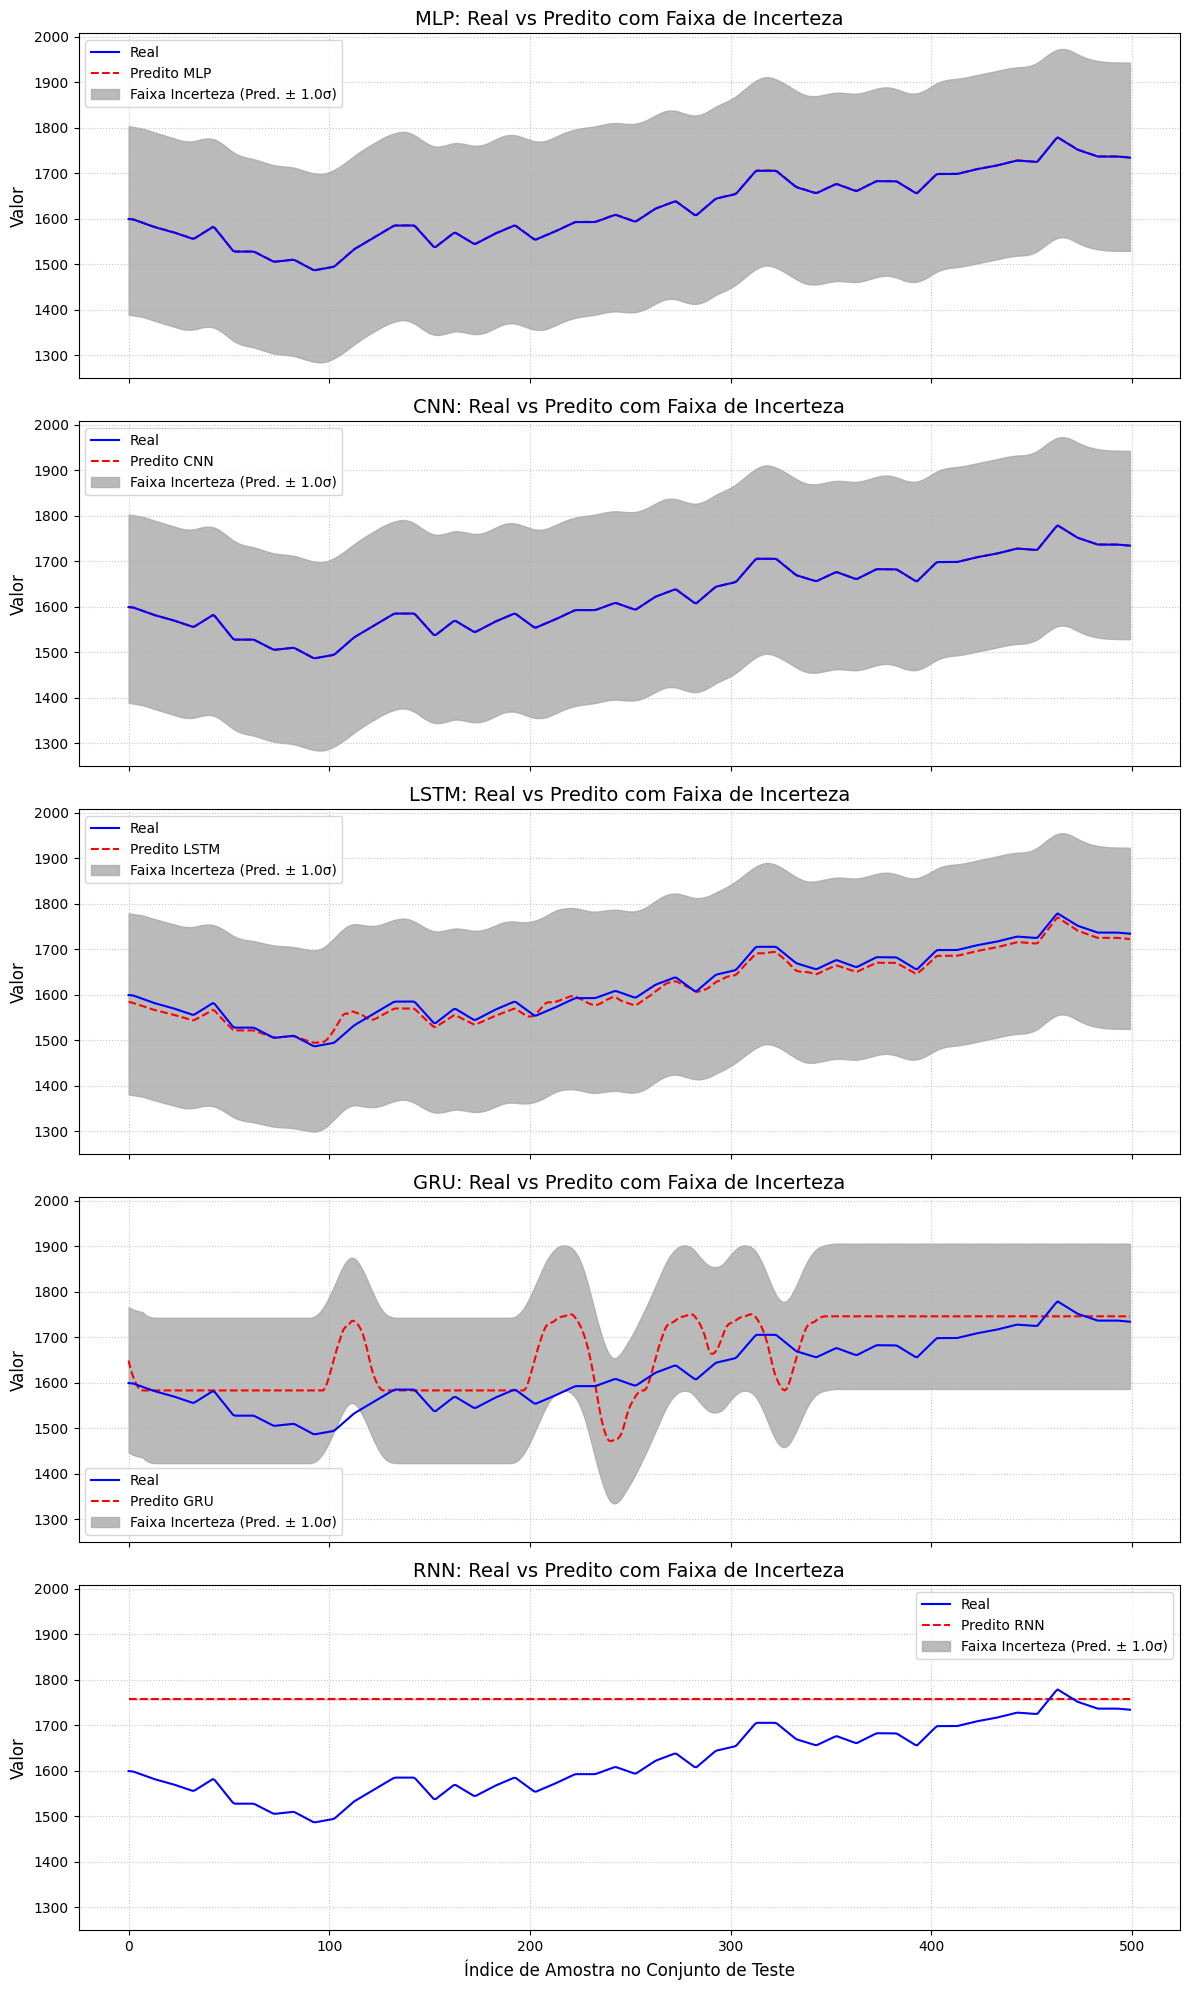


Gráficos de Real vs Predito gerados.


In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------
# ETAPA 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS
# -------------------------------------------------------------------------
data = pd.read_csv('/content/oficialtcld0903.csv')  # Atualize o caminho se necessário

X = data.drop(columns=['TCSacr'])
y = data['bal75']



# --- NOVA ETAPA: SELECIONAR 80% DO DATASET PARA ANÁLISE ---
fraction_to_use_for_analysis = 0.6
# Opção 1: Selecionar uma amostra aleatória de 80% (recomendado para evitar viés de ordenação)
#data = data.sample(frac=fraction_to_use_for_analysis, random_state=42).copy() # random_state para reprodutibilidade
# Opção 2: Selecionar as primeiras 80% das linhas (se a ordem for importante e intencional)
num_rows_to_keep = int(len(data * fraction_to_use_for_analysis)
data = data.iloc[:num_rows_to_keep].copy()

print(f"Selecionando {len(data)} linhas ({fraction_to_use_for_analysis*100:.0f}%) do dataset original para análise.")
# --- FIM DA NOVA ETAPA ---


# Dividir os dados em treino (80%) e teste (20%)
# Usando a lógica de n_train para um split 80/20
split_percentage_train = 0.9
n_train = int(len(X) * split_percentage_train)

if n_train == 0 or n_train == len(X):
    print(f"Erro: Divisão de treino/teste resultou em um conjunto de treino ou teste vazio.")
    print(f"Total de amostras: {len(X)}, Amostras de treino calculadas (80%): {n_train}")
    exit()

X_train, X_test = X.iloc[:n_train], X.iloc[n_train:]
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

print(f"\nDos {len(X)} dados selecionados para o processo:")
print(f" - {len(X_train)} amostras para treino ({split_percentage_train*100:.0f}%)")
print(f" - {len(X_test)} amostras para teste ({(1-split_percentage_train)*100:.0f}%)")

if X_train.empty or X_test.empty:
    print("Erro crítico: Conjuntos de treino ou teste estão vazios após a divisão. Verifique o tamanho dos dados.")
    exit()

# -------------------------------------------------------------------------
# ETAPA 2: DEFINIÇÃO DOS MODELOS
# -------------------------------------------------------------------------
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(10, input_dim=input_dim, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_dim):
    model = Sequential([
        Conv1D(10, 2, activation='relu', input_shape=(input_dim, 1)), # CNN espera entrada 3D
        Flatten(),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_dim):
    model = Sequential([
        LSTM(10, input_shape=(input_dim, 1), activation='tanh'), # LSTM espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_gru_model(input_dim):
    model = Sequential([
        GRU(10, input_shape=(input_dim, 1), activation='tanh'), # GRU espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_dim):
    model = Sequential([
        SimpleRNN(10, input_shape=(input_dim, 1), activation='tanh'), # RNN espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# -------------------------------------------------------------------------
# ETAPA 3: FUNÇÃO DE TREINAMENTO E AVALIAÇÃO
# -------------------------------------------------------------------------
def train_and_evaluate_model(model_name, model, X_train_data, y_train_data, X_test_data, y_test_data):
    print(f"\nTreinando e avaliando {model_name}...")

    if model_name in ['CNN', 'LSTM', 'GRU', 'RNN']:
        X_train_vals = X_train_data.values if isinstance(X_train_data, pd.DataFrame) else X_train_data
        X_test_vals = X_test_data.values if isinstance(X_test_data, pd.DataFrame) else X_test_data

        X_train_r = np.expand_dims(X_train_vals, axis=2)
        X_test_r = np.expand_dims(X_test_vals, axis=2)

        history = model.fit(X_train_r, y_train_data, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_r, verbose=0).flatten()
    else: # MLP
        history = model.fit(X_train_data, y_train_data, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_data, verbose=0).flatten()

    mae = mean_absolute_error(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Model - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    return y_pred, rmse

# -------------------------------------------------------------------------
# ETAPA 4: TREINAMENTO DOS MODELOS
# -------------------------------------------------------------------------
input_dimension = X_train.shape[1] # Número de features

mlp_model = create_mlp_model(input_dimension)
cnn_model = create_cnn_model(input_dimension)
lstm_model = create_lstm_model(input_dimension)
gru_model = create_gru_model(input_dimension)
rnn_model = create_rnn_model(input_dimension)

print("\nIniciando treinamento e avaliação dos modelos (sobre o subconjunto de dados)...")

y_pred_mlp, _ = train_and_evaluate_model("MLP", mlp_model, X_train, y_train, X_test, y_test)
y_pred_cnn, _ = train_and_evaluate_model("CNN", cnn_model, X_train, y_train, X_test, y_test)
y_pred_lstm, _ = train_and_evaluate_model("LSTM", lstm_model, X_train, y_train, X_test, y_test)
y_pred_gru, _ = train_and_evaluate_model("GRU", gru_model, X_train, y_train, X_test, y_test)
y_pred_rnn, _ = train_and_evaluate_model("RNN", rnn_model, X_train, y_train, X_test, y_test)

print("\nTreinamento e avaliação concluídos.")

# Coletar resultados para plotagem
results_for_plotting = {
    "MLP": y_pred_mlp,
    "CNN": y_pred_cnn,
    "LSTM": y_pred_lstm,
    "GRU": y_pred_gru,
    "RNN": y_pred_rnn
}
can_plot = True

# -------------------------------------------------------------------------
# ETAPA 5: FUNÇÕES DE PLOTAGEM E EXECUÇÃO
# -------------------------------------------------------------------------

def smooth_series(series, window_size=1):
    """Aplica suavização de média móvel a uma série."""
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(window=window_size, min_periods=1, center=True).mean().values

def plot_real_vs_predito_com_incerteza_subplots(
    results_dict,
    y_test_data,
    num_points_to_plot=500,
    scale_factor=1.0,
    smoothing_window=15,
    enable_smoothing=True,
    pred_line_color='red',
    real_line_color='blue',
    interval_fill_color='gray',
    interval_alpha=0.4
):
    model_names = list(results_dict.keys())
    num_models = len(model_names)

    if num_models == 0:
        print("Nenhum resultado de modelo para plotar em 'Real vs Predito'.")
        return

    if isinstance(y_test_data, pd.Series):
        y_test_np = y_test_data.values
    elif isinstance(y_test_data, list):
        y_test_np = np.array(y_test_data)
    else:
        y_test_np = y_test_data

    actual_points_to_plot = min(num_points_to_plot, len(y_test_np))
    y_test_plot_slice = y_test_np[:actual_points_to_plot]
    indices = np.arange(actual_points_to_plot)

    fig, axs = plt.subplots(num_models, 1, figsize=(12, 4 * num_models), sharex=True, sharey=True)
    if num_models == 1:
        axs = [axs]

    print(f"\n🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...")

    for i, model_name in enumerate(model_names):
        ax = axs[i]

        all_model_predictions = results_dict[model_name]
        if isinstance(all_model_predictions, pd.Series):
            all_model_predictions_np = all_model_predictions.values
        elif isinstance(all_model_predictions, list):
            all_model_predictions_np = np.array(all_model_predictions)
        else:
            all_model_predictions_np = all_model_predictions

        predictions_plot_slice = all_model_predictions_np[:actual_points_to_plot]

        pred_std_dev = np.std(all_model_predictions_np)

        half_interval_width = scale_factor * pred_std_dev
        print(f"  Informações da Faixa para o Modelo: {model_name}")
        print(f"    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: {pred_std_dev:.2f}")
        print(f"    - Largura da Faixa (valor ± em relação à predição): {half_interval_width:.2f} (correspondente a {scale_factor:.1f}σ)")

        lower_bound = predictions_plot_slice - half_interval_width
        upper_bound = predictions_plot_slice + half_interval_width

        if enable_smoothing and smoothing_window > 1:
            lower_bound_smooth = smooth_series(lower_bound.flatten(), window_size=smoothing_window)
            upper_bound_smooth = smooth_series(upper_bound.flatten(), window_size=smoothing_window)
        else:
            lower_bound_smooth = lower_bound.flatten()
            upper_bound_smooth = upper_bound.flatten()

        ax.plot(indices, y_test_plot_slice, color=real_line_color, label='Real', linewidth=1.5, zorder=3)
        ax.plot(indices, predictions_plot_slice, color=pred_line_color, label=f'Predito {model_name}', linewidth=1.5, linestyle='--', zorder=2)
        ax.fill_between(
            indices, lower_bound_smooth, upper_bound_smooth,
            color=interval_fill_color, alpha=interval_alpha,
            label=f'Faixa Incerteza (Pred. ± {scale_factor:.1f}σ)', zorder=1
        )
        ax.set_title(f'{model_name}: Real vs Predito com Faixa de Incerteza', fontsize=14)
        ax.set_ylabel('Valor', fontsize=12)
        if i == num_models - 1:
            ax.set_xlabel('Índice de Amostra no Conjunto de Teste', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()
    print("\nGráficos de Real vs Predito gerados.")

# Executar a plotagem se o treinamento ocorreu e y_test está disponível
if can_plot and 'y_test' in locals() and y_test is not None and not y_test.empty: # Adicionada verificação para y_test não ser None
    plot_real_vs_predito_com_incerteza_subplots(
        results_dict=results_for_plotting,
        y_test_data=y_test,
        num_points_to_plot=500,
        scale_factor=1.0,
        interval_fill_color='darkgray',
        interval_alpha=0.8,
        enable_smoothing=True,
        smoothing_window=15
    )
elif not can_plot:
    print("\nPlotagem não realizada porque o treinamento dos modelos foi pulado ou falhou.")
else:
    print("\nPlotagem não realizada porque 'y_test' não está definido, está vazio ou é None.")



Selecionando 62321 linhas (80%) do dataset original para análise.

Dos 77902 dados selecionados para o processo:
 - 70111 amostras para treino (90%)
 - 7791 amostras para teste (10%)

Iniciando treinamento e avaliação dos modelos (sobre o subconjunto de dados)...

Treinando e avaliando LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model - MAE: 56.7072, MSE: 3496.9374, RMSE: 59.1349

Treinando e avaliando GRU...
GRU Model - MAE: 4.3468, MSE: 81.8236, RMSE: 9.0456

Treinamento e avaliação concluídos.

🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...
  Informações da Faixa para o Modelo: LSTM
    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: 191.33
    - Largura da Faixa (valor ± em relação à predição): 191.33 (correspondente a 1.0σ)
  Informações da Faixa para o Modelo: GRU
    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: 203.86
    - Largura da Faixa (valor ± em relação à predição): 203.86 (correspondente a 1.0σ)


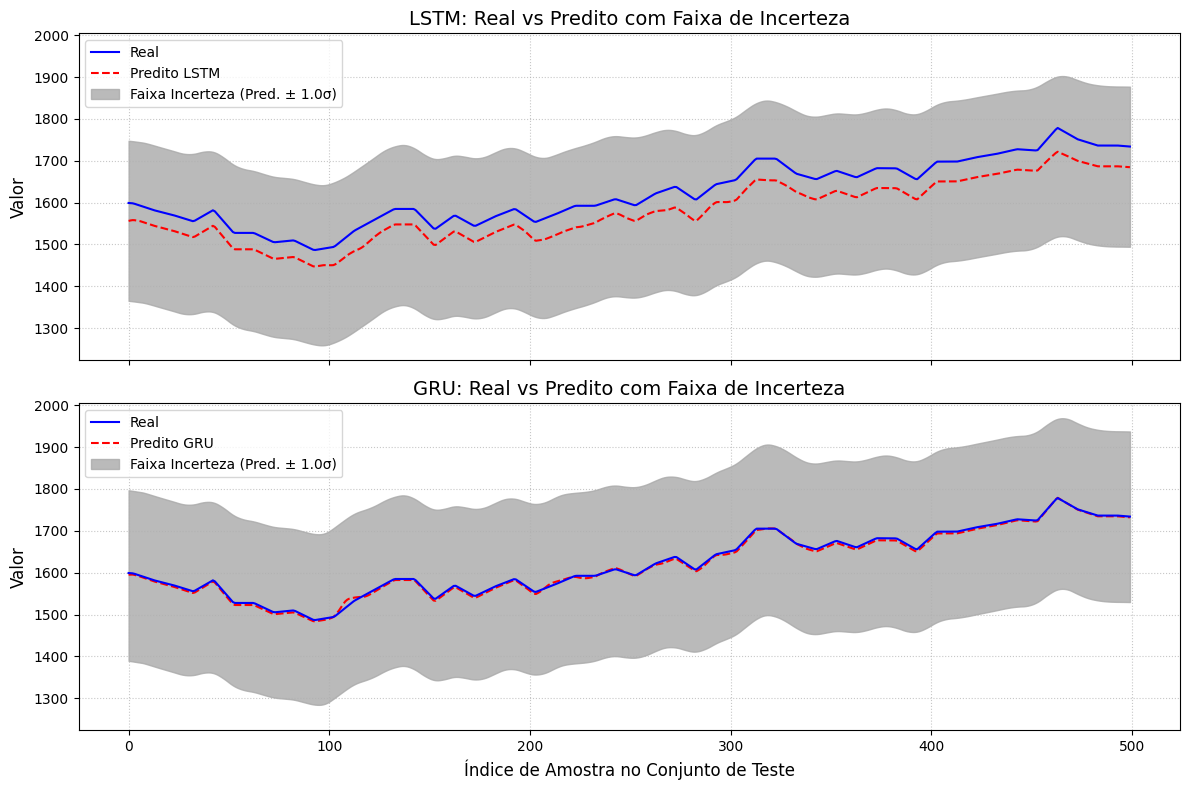


Gráficos de Real vs Predito gerados.


In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------
# ETAPA 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS
# -------------------------------------------------------------------------
data = pd.read_csv('/content/oficialtcld0903.csv')  # Atualize o caminho se necessário

X = data.drop(columns=['TCSacr'])
y = data['bal75']



# --- NOVA ETAPA: SELECIONAR 80% DO DATASET PARA ANÁLISE ---
fraction_to_use_for_analysis = 0.8
# Opção 1: Selecionar uma amostra aleatória de 80% (recomendado para evitar viés de ordenação)
#data = data.sample(frac=fraction_to_use_for_analysis, random_state=42).copy() # random_state para reprodutibilidade
# Opção 2: Selecionar as primeiras 80% das linhas (se a ordem for importante e intencional)
num_rows_to_keep = int(len(data) * fraction_to_use_for_analysis)
data = data.iloc[:num_rows_to_keep].copy()

print(f"Selecionando {len(data)} linhas ({fraction_to_use_for_analysis*100:.0f}%) do dataset original para análise.")
# --- FIM DA NOVA ETAPA ---


# Dividir os dados em treino (80%) e teste (20%)
# Usando a lógica de n_train para um split 80/20
split_percentage_train = 0.9
n_train = int(len(X) * split_percentage_train)

if n_train == 0 or n_train == len(X):
    print(f"Erro: Divisão de treino/teste resultou em um conjunto de treino ou teste vazio.")
    print(f"Total de amostras: {len(X)}, Amostras de treino calculadas (80%): {n_train}")
    exit()

X_train, X_test = X.iloc[:n_train], X.iloc[n_train:]
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

print(f"\nDos {len(X)} dados selecionados para o processo:")
print(f" - {len(X_train)} amostras para treino ({split_percentage_train*100:.0f}%)")
print(f" - {len(X_test)} amostras para teste ({(1-split_percentage_train)*100:.0f}%)")

if X_train.empty or X_test.empty:
    print("Erro crítico: Conjuntos de treino ou teste estão vazios após a divisão. Verifique o tamanho dos dados.")
    exit()

# -------------------------------------------------------------------------
# ETAPA 2: DEFINIÇÃO DOS MODELOS
# -------------------------------------------------------------------------

def create_lstm_model(input_dim):
    model = Sequential([
        LSTM(10, input_shape=(input_dim, 1), activation='tanh'), # LSTM espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_gru_model(input_dim):
    model = Sequential([
        GRU(10, input_shape=(input_dim, 1), activation='tanh'), # GRU espera entrada 3D
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# -------------------------------------------------------------------------
# ETAPA 3: FUNÇÃO DE TREINAMENTO E AVALIAÇÃO
# -------------------------------------------------------------------------
def train_and_evaluate_model(model_name, model, X_train_data, y_train_data, X_test_data, y_test_data):
    print(f"\nTreinando e avaliando {model_name}...")

    if model_name in [ 'LSTM', 'GRU',]:
        X_train_vals = X_train_data.values if isinstance(X_train_data, pd.DataFrame) else X_train_data
        X_test_vals = X_test_data.values if isinstance(X_test_data, pd.DataFrame) else X_test_data

        X_train_r = np.expand_dims(X_train_vals, axis=2)
        X_test_r = np.expand_dims(X_test_vals, axis=2)

        history = model.fit(X_train_r, y_train_data, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_r, verbose=0).flatten()
    else: # MLP
        history = model.fit(X_train_data, y_train_data, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_data, verbose=0).flatten()

    mae = mean_absolute_error(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Model - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    return y_pred, rmse

# -------------------------------------------------------------------------
# ETAPA 4: TREINAMENTO DOS MODELOS
# -------------------------------------------------------------------------
input_dimension = X_train.shape[1] # Número de features


lstm_model = create_lstm_model(input_dimension)
gru_model = create_gru_model(input_dimension)

print("\nIniciando treinamento e avaliação dos modelos (sobre o subconjunto de dados)...")


y_pred_lstm, _ = train_and_evaluate_model("LSTM", lstm_model, X_train, y_train, X_test, y_test)
y_pred_gru, _ = train_and_evaluate_model("GRU", gru_model, X_train, y_train, X_test, y_test)


print("\nTreinamento e avaliação concluídos.")

# Coletar resultados para plotagem
results_for_plotting = {
    "LSTM": y_pred_lstm,
    "GRU": y_pred_gru,
}
can_plot = True

# -------------------------------------------------------------------------
# ETAPA 5: FUNÇÕES DE PLOTAGEM E EXECUÇÃO
# -------------------------------------------------------------------------

def smooth_series(series, window_size=1):
    """Aplica suavização de média móvel a uma série."""
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(window=window_size, min_periods=1, center=True).mean().values

def plot_real_vs_predito_com_incerteza_subplots(
    results_dict,
    y_test_data,
    num_points_to_plot=500,
    scale_factor=1.0,
    smoothing_window=15,
    enable_smoothing=True,
    pred_line_color='red',
    real_line_color='blue',
    interval_fill_color='gray',
    interval_alpha=0.4
):
    model_names = list(results_dict.keys())
    num_models = len(model_names)

    if num_models == 0:
        print("Nenhum resultado de modelo para plotar em 'Real vs Predito'.")
        return

    if isinstance(y_test_data, pd.Series):
        y_test_np = y_test_data.values
    elif isinstance(y_test_data, list):
        y_test_np = np.array(y_test_data)
    else:
        y_test_np = y_test_data

    actual_points_to_plot = min(num_points_to_plot, len(y_test_np))
    y_test_plot_slice = y_test_np[:actual_points_to_plot]
    indices = np.arange(actual_points_to_plot)

    fig, axs = plt.subplots(num_models, 1, figsize=(12, 4 * num_models), sharex=True, sharey=True)
    if num_models == 1:
        axs = [axs]

    print(f"\n🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...")

    for i, model_name in enumerate(model_names):
        ax = axs[i]

        all_model_predictions = results_dict[model_name]
        if isinstance(all_model_predictions, pd.Series):
            all_model_predictions_np = all_model_predictions.values
        elif isinstance(all_model_predictions, list):
            all_model_predictions_np = np.array(all_model_predictions)
        else:
            all_model_predictions_np = all_model_predictions

        predictions_plot_slice = all_model_predictions_np[:actual_points_to_plot]

        pred_std_dev = np.std(all_model_predictions_np)

        half_interval_width = scale_factor * pred_std_dev
        print(f"  Informações da Faixa para o Modelo: {model_name}")
        print(f"    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: {pred_std_dev:.2f}")
        print(f"    - Largura da Faixa (valor ± em relação à predição): {half_interval_width:.2f} (correspondente a {scale_factor:.1f}σ)")

        lower_bound = predictions_plot_slice - half_interval_width
        upper_bound = predictions_plot_slice + half_interval_width

        if enable_smoothing and smoothing_window > 1:
            lower_bound_smooth = smooth_series(lower_bound.flatten(), window_size=smoothing_window)
            upper_bound_smooth = smooth_series(upper_bound.flatten(), window_size=smoothing_window)
        else:
            lower_bound_smooth = lower_bound.flatten()
            upper_bound_smooth = upper_bound.flatten()

        ax.plot(indices, y_test_plot_slice, color=real_line_color, label='Real', linewidth=1.5, zorder=3)
        ax.plot(indices, predictions_plot_slice, color=pred_line_color, label=f'Predito {model_name}', linewidth=1.5, linestyle='--', zorder=2)
        ax.fill_between(
            indices, lower_bound_smooth, upper_bound_smooth,
            color=interval_fill_color, alpha=interval_alpha,
            label=f'Faixa Incerteza (Pred. ± {scale_factor:.1f}σ)', zorder=1
        )
        ax.set_title(f'{model_name}: Real vs Predito com Faixa de Incerteza', fontsize=14)
        ax.set_ylabel('Valor', fontsize=12)
        if i == num_models - 1:
            ax.set_xlabel('Índice de Amostra no Conjunto de Teste', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()
    print("\nGráficos de Real vs Predito gerados.")

# Executar a plotagem se o treinamento ocorreu e y_test está disponível
if can_plot and 'y_test' in locals() and y_test is not None and not y_test.empty: # Adicionada verificação para y_test não ser None
    plot_real_vs_predito_com_incerteza_subplots(
        results_dict=results_for_plotting,
        y_test_data=y_test,
        num_points_to_plot=500,
        scale_factor=1.0,
        interval_fill_color='darkgray',
        interval_alpha=0.8,
        enable_smoothing=True,
        smoothing_window=15
    )
elif not can_plot:
    print("\nPlotagem não realizada porque o treinamento dos modelos foi pulado ou falhou.")
else:
    print("\nPlotagem não realizada porque 'y_test' não está definido, está vazio ou é None.")



Selecionando 62321 linhas (80%) do dataset original para análise.

Dos 77902 dados selecionados:
 - 70111 amostras para treino (90%)
 - 7791 amostras para teste (10%)

Iniciando validação cruzada para LSTM...

Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Loss: 4510.7061

Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 2 - Loss: 4235.2109

Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 3 - Loss: 7114.9077

Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 4 - Loss: 7178.7671

Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 5 - Loss: 6065.0625

Resultados da validação cruzada para LSTM:
- Loss médio: 5820.9309 ± 1249.7114


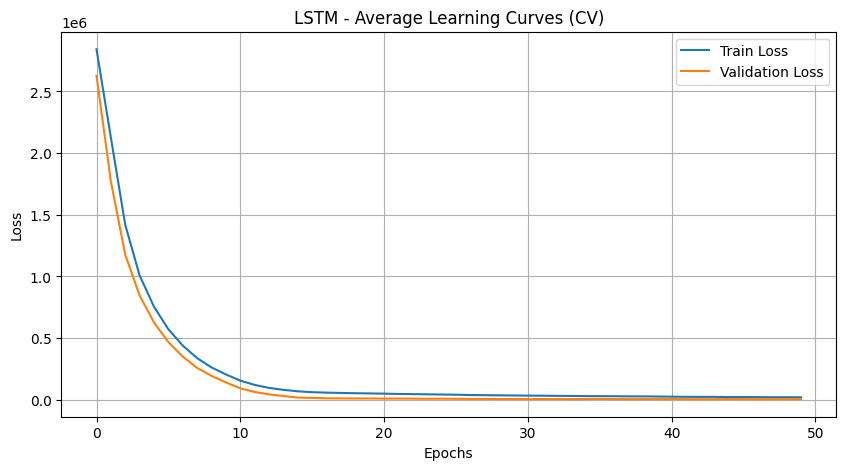


Iniciando validação cruzada para GRU...

Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Loss: 11185.0254

Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# -------------------------------------------------------------------------
# ETAPA 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS
# -------------------------------------------------------------------------
data = pd.read_csv('/content/oficialtcld0903.csv')  # Atualize o caminho se necessário
X = data.drop(columns=['TCSacr'])
y = data['bal75']

# Selecionar 80% do dataset para análise
fraction_to_use_for_analysis = 0.8
num_rows_to_keep = int(len(data) * fraction_to_use_for_analysis)
data = data.iloc[:num_rows_to_keep].copy()
print(f"Selecionando {len(data)} linhas ({fraction_to_use_for_analysis*100:.0f}%) do dataset original para análise.")

# Dividir os dados em treino (90%) e teste (10%)
split_percentage_train = 0.9
n_train = int(len(X) * split_percentage_train)

if n_train == 0 or n_train == len(X):
    print(f"Erro: Divisão de treino/teste inválida.")
    exit()

X_train, X_test = X.iloc[:n_train], X.iloc[n_train:]
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

print(f"\nDos {len(X)} dados selecionados:")
print(f" - {len(X_train)} amostras para treino ({split_percentage_train*100:.0f}%)")
print(f" - {len(X_test)} amostras para teste ({(1-split_percentage_train)*100:.0f}%)")

# -------------------------------------------------------------------------
# ETAPA 2: DEFINIÇÃO DOS MODELOS COM REGULARIZAÇÃO
# -------------------------------------------------------------------------
def create_lstm_model(input_dim):
    model = Sequential([
        LSTM(10, input_shape=(input_dim, 1)),
        Dropout(0.2),
        Dense(10, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_gru_model(input_dim):
    model = Sequential([
        GRU(10, input_shape=(input_dim, 1)),
        Dropout(0.2),
        Dense(10, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# -------------------------------------------------------------------------
# ETAPA 3: FUNÇÕES DE MONITORAMENTO
# -------------------------------------------------------------------------
def check_overfitting(history, model_name):
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    overfitting_ratio = val_loss / train_loss

    print(f"\nOverfitting Analysis for {model_name}:")
    print(f"- Final Train Loss: {train_loss:.4f}")
    print(f"- Final Val Loss: {val_loss:.4f}")
    print(f"- Val/Train Ratio: {overfitting_ratio:.2f}")

    if overfitting_ratio > 2:
        print("⚠️ Strong Overfitting Warning!")
    elif overfitting_ratio > 1.5:
        print("⚠️ Moderate Overfitting Detected")
    else:
        print("✅ No significant overfitting detected")

def plot_learning_curves(history, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------------------------------------------------------------
# ETAPA 4: TREINAMENTO COM EARLY STOPPING
# -------------------------------------------------------------------------
def train_and_evaluate_model(model_name, model, X_train_data, y_train_data, X_test_data, y_test_data):
    print(f"\nTreinando {model_name}...")

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    if model_name in ['LSTM', 'GRU']:
        X_train_r = np.expand_dims(X_train_data, axis=2)
        X_test_r = np.expand_dims(X_test_data, axis=2)

        history = model.fit(
            X_train_r, y_train_data,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_split=0.2,
            callbacks=[early_stop]
        )

        y_pred = model.predict(X_test_r, verbose=0).flatten()
    else:
        history = model.fit(
            X_train_data, y_train_data,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_split=0.2,
            callbacks=[early_stop]
        )
        y_pred = model.predict(X_test_data, verbose=0).flatten()

    # Métricas de avaliação
    mae = mean_absolute_error(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_data, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"- MAE: {mae:.4f}")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- R²: {r2:.4f}")

    if abs(mae) < 0.1 * y_test_data.std():
        print("⚠️ ATENÇÃO: MAE muito baixo - suspeita de overfitting ou vazamento de dados")

    # Análise de overfitting
    check_overfitting(history, model_name)
    plot_learning_curves(history, model_name)

    # Análise de resíduos
    residuals = y_test_data - y_pred
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(f'{model_name} - Residual Analysis')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    return y_pred, history

# -------------------------------------------------------------------------
# ETAPA 5: VALIDAÇÃO CRUZADA
# -------------------------------------------------------------------------
def cross_validate_model(model_func, X, y, model_name, n_splits=5):
    print(f"\nIniciando validação cruzada para {model_name}...")
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = []
    histories = []

    for fold, (train_index, test_index) in enumerate(tscv.split(X)):
        print(f"\nFold {fold+1}/{n_splits}")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = model_func(X_train.shape[1])

        if model_name in ['LSTM', 'GRU']:
            X_train_r = np.expand_dims(X_train, axis=2)
            X_test_r = np.expand_dims(X_test, axis=2)

            history = model.fit(
                X_train_r, y_train,
                epochs=50,
                batch_size=32,
                verbose=0,
                validation_split=0.2
            )

            score = model.evaluate(X_test_r, y_test, verbose=0)
        else:
            history = model.fit(
                X_train, y_train,
                epochs=50,
                batch_size=32,
                verbose=0,
                validation_split=0.2
            )
            score = model.evaluate(X_test, y_test, verbose=0)

        scores.append(score)
        histories.append(history)

        print(f"Fold {fold+1} - Loss: {score:.4f}")

    print(f"\nResultados da validação cruzada para {model_name}:")
    print(f"- Loss médio: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

    # Plotar curvas de aprendizado médias
    avg_loss = np.mean([h.history['loss'] for h in histories], axis=0)
    avg_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)

    plt.figure(figsize=(10, 5))
    plt.plot(avg_loss, label='Train Loss')
    plt.plot(avg_val_loss, label='Validation Loss')
    plt.title(f'{model_name} - Average Learning Curves (CV)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return scores

# -------------------------------------------------------------------------
# ETAPA 6: EXECUÇÃO PRINCIPAL
# -------------------------------------------------------------------------
input_dim = X_train.shape[1]

# Criar modelos
lstm_model = create_lstm_model(input_dim)
gru_model = create_gru_model(input_dim)

# Validação cruzada
cross_validate_model(create_lstm_model, X_train, y_train, 'LSTM')
cross_validate_model(create_gru_model, X_train, y_train, 'GRU')

# Treinamento final
print("\nTreinamento final nos dados completos...")
y_pred_lstm, lstm_history = train_and_evaluate_model("LSTM", lstm_model, X_train, y_train, X_test, y_test)
y_pred_gru, gru_history = train_and_evaluate_model("GRU", gru_model, X_train, y_train, X_test, y_test)

# -------------------------------------------------------------------------
# ETAPA 7: VISUALIZAÇÃO DE RESULTADOS
# -------------------------------------------------------------------------
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true.values[:200], label='Real', alpha=0.7)
    plt.plot(y_pred[:200], label='Predito', alpha=0.7)
    plt.title(f'{model_name} - Comparação Real vs Predito (primeiras 200 amostras)')
    plt.xlabel('Amostras')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_test, y_pred_lstm, 'LSTM')
plot_predictions(y_test, y_pred_gru, 'GRU')

def smooth_series(series, window_size=1):
    """Aplica suavização de média móvel a uma série."""
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(window=window_size, min_periods=1, center=True).mean().values

def plot_real_vs_predito_com_incerteza_subplots(
    results_dict,
    y_test_data,
    num_points_to_plot=500,
    scale_factor=1.0,
    smoothing_window=15,
    enable_smoothing=True,
    pred_line_color='red',
    real_line_color='blue',
    interval_fill_color='gray',
    interval_alpha=0.4
):
    model_names = list(results_dict.keys())
    num_models = len(model_names)

    if num_models == 0:
        print("Nenhum resultado de modelo para plotar em 'Real vs Predito'.")
        return

    if isinstance(y_test_data, pd.Series):
        y_test_np = y_test_data.values
    elif isinstance(y_test_data, list):
        y_test_np = np.array(y_test_data)
    else:
        y_test_np = y_test_data

    actual_points_to_plot = min(num_points_to_plot, len(y_test_np))
    y_test_plot_slice = y_test_np[:actual_points_to_plot]
    indices = np.arange(actual_points_to_plot)

    fig, axs = plt.subplots(num_models, 1, figsize=(12, 4 * num_models), sharex=True, sharey=True)
    if num_models == 1:
        axs = [axs]

    print(f"\n🔎 Gerando gráficos de Real vs. Predito com Faixa de Incerteza (Subplots)...")

    for i, model_name in enumerate(model_names):
        ax = axs[i]

        all_model_predictions = results_dict[model_name]
        if isinstance(all_model_predictions, pd.Series):
            all_model_predictions_np = all_model_predictions.values
        elif isinstance(all_model_predictions, list):
            all_model_predictions_np = np.array(all_model_predictions)
        else:
            all_model_predictions_np = all_model_predictions

        predictions_plot_slice = all_model_predictions_np[:actual_points_to_plot]

        pred_std_dev = np.std(all_model_predictions_np)

        half_interval_width = scale_factor * pred_std_dev
        print(f"  Informações da Faixa para o Modelo: {model_name}")
        print(f"    - Desvio Padrão das Predições (σ) em todo o conjunto de teste: {pred_std_dev:.2f}")
        print(f"    - Largura da Faixa (valor ± em relação à predição): {half_interval_width:.2f} (correspondente a {scale_factor:.1f}σ)")

        lower_bound = predictions_plot_slice - half_interval_width
        upper_bound = predictions_plot_slice + half_interval_width

        if enable_smoothing and smoothing_window > 1:
            lower_bound_smooth = smooth_series(lower_bound.flatten(), window_size=smoothing_window)
            upper_bound_smooth = smooth_series(upper_bound.flatten(), window_size=smoothing_window)
        else:
            lower_bound_smooth = lower_bound.flatten()
            upper_bound_smooth = upper_bound.flatten()

        ax.plot(indices, y_test_plot_slice, color=real_line_color, label='Real', linewidth=1.5, zorder=3)
        ax.plot(indices, predictions_plot_slice, color=pred_line_color, label=f'Predito {model_name}', linewidth=1.5, linestyle='--', zorder=2)
        ax.fill_between(
            indices, lower_bound_smooth, upper_bound_smooth,
            color=interval_fill_color, alpha=interval_alpha,
            label=f'Faixa Incerteza (Pred. ± {scale_factor:.1f}σ)', zorder=1
        )
        ax.set_title(f'{model_name}: Real vs Predito com Faixa de Incerteza', fontsize=14)
        ax.set_ylabel('Valor', fontsize=12)
        if i == num_models - 1:
            ax.set_xlabel('Índice de Amostra no Conjunto de Teste', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()
    print("\nGráficos de Real vs Predito gerados.")

# Executar a plotagem se o treinamento ocorreu e y_test está disponível
if can_plot and 'y_test' in locals() and y_test is not None and not y_test.empty: # Adicionada verificação para y_test não ser None
    plot_real_vs_predito_com_incerteza_subplots(
        results_dict=results_for_plotting,
        y_test_data=y_test,
        num_points_to_plot=500,
        scale_factor=1.0,
        interval_fill_color='darkgray',
        interval_alpha=0.8,
        enable_smoothing=True,
        smoothing_window=15
    )
elif not can_plot:
    print("\nPlotagem não realizada porque o treinamento dos modelos foi pulado ou falhou.")
else:
    print("\nPlotagem não realizada porque 'y_test' não está definido, está vazio ou é None.")



# -------------------------------------------------------------------------
# ETAPA 8: ANÁLISE DE PERFORMANCE
# -------------------------------------------------------------------------
def performance_report(y_true, y_pred, model_name):
    error = y_true - y_pred
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Performance Report:")
    print(f"- MAE: {mae:.4f}")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- R²: {r2:.4f}")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(error, bins=50)
    plt.title(f'{model_name} - Distribuição de Erros')
    plt.xlabel('Erro')
    plt.ylabel('Frequência')

    plt.subplot(1, 2, 2)
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f'{model_name} - Valores Reais vs Preditos')
    plt.xlabel('Real')
    plt.ylabel('Predito')

    plt.tight_layout()
    plt.show()

performance_report(y_test, y_pred_lstm, 'LSTM')
performance_report(y_test, y_pred_gru, 'GRU')